In [1]:
# from dask.distributed import Client

In [2]:
# client = Client('140.208.147.173:34671')

In [3]:
# client

### Using Xarray and net Files

In [4]:
import xarray as xr
import cartopy
import cmocean
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.colorbar
import numpy

In [5]:
%%time

#300yr OM4files, date 198801 - 200712

#chunk along dim = 'time'
OM4p25 = xr.open_mfdataset('/work/Nkeh.Boh/SST/NetOMfiles/OM4p25/*.nc')
OM4p25z = xr.open_mfdataset('/work/Nkeh.Boh/SST/NetOMfiles/OM4p25z/*.nc')
OM4p5nep = xr.open_mfdataset('/work/Nkeh.Boh/SST/NetOMfiles/OM4p5nep/*.nc')
OM4p5mle =xr.open_mfdataset('/work/Nkeh.Boh/SST/NetOMfiles/OM4p5mle/*.nc')
OM4p5 = xr.open_mfdataset('/work/Nkeh.Boh/SST/NetOMfiles/OM4p5/*.nc')
# WOA files
W25 = xr.open_dataset('/work/Nkeh.Boh/SST/NetOMfiles/W25/WOA05_ptemp_salt_monthly.v20141007.nc')
W5 = xr.open_dataset('/work/Nkeh.Boh/SST/NetOMfiles/W05/WOA05_ptemp_salt_monthly.v2015.12.03.nc')
# 105GB < T_fileSize <110GB

#Grid files
G25 = xr.open_dataset('/work/Nkeh.Boh/SST/NetOMfiles/G25/ocean_hgrid.nc')
G5 = xr.open_dataset('/work/Nkeh.Boh/SST/NetOMfiles/G5/ocean_hgrid.nc')
M25 = xr.open_dataset('/work/Nkeh.Boh/SST/NetOMfiles/M25/ocean_mask.nc')
M5 = xr.open_dataset('/work/Nkeh.Boh/SST/NetOMfiles/M5/ocean_mask.nc')

OM4p25_av = OM4p25['tos'].mean(dim='time')#.load()
OM4p5nep_av = OM4p5nep['tos'].mean(dim='time')#.load()
OM4p25z_av = OM4p25z['tos'].mean(dim='time')#.load()
OM4p5_av = OM4p5['tos'].mean(dim='time')#.load()
OM4p5mle_av = OM4p5mle['tos'].mean(dim='time')#.load()

W25_av = W25['ptemp'].mean(axis=(0,1))#.load()
W5_av = W5['ptemp'].mean(axis=(0,1))#.load()

/nbhome/Nkeh.Boh/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


CPU times: user 8.21 s, sys: 7.55 s, total: 15.8 s
Wall time: 15.9 s


In [6]:
%%time
xq25 = G25.variables['x'][:][::2,::2]
yq25 = G25.variables['y'][:][::2,::2]
a25 = G25.variables['area'][:]; a25 = a25[::2,::2]+a25[1::2,1::2]+a25[1::2,::2]+a25[1::2,::2]
m25 = M25.variables['mask'][:]; a25 = a25*m25
xq5 = G5.variables['x'][:][::2,::2]
yq5 = G5.variables['y'][:][::2,::2]
a5 = G5.variables['area'][:]; a5 = a5[::2,::2]+a5[1::2,1::2]+a5[1::2,::2]+a5[1::2,::2]
m5 = M5.variables['mask'][:]; a5 = a5*m5

CPU times: user 921 ms, sys: 141 ms, total: 1.06 s
Wall time: 1.06 s


In [7]:
%%time
def stats(ax, area, anomaly, label):
    area, anomaly = area.values, anomaly.fillna(0).values
    mn = (anomaly*area).sum()/area.sum()
    sd = numpy.sqrt( ((anomaly-mn)**2*area).sum()/area.sum() )
    rms = numpy.sqrt( (anomaly**2*area).sum()/area.sum() )
    qmn, qmx = anomaly.min(), anomaly.max()
    print(label, 'mean =', mn, 'sd =', sd, 'rms =', rms, 'min =', qmn, 'max =', qmx )
    bb = ax.get_position()
    plt.gcf().text(bb.x0,bb.y1+.01,'mean=%.3f$^\circ$C'%mn, horizontalalignment='left')
    plt.gcf().text(bb.x1,bb.y1+.01,'rms=%.3f$^\circ$C'%rms, horizontalalignment='right')


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.96 µs


#### Let someone take a look

In [8]:
%%time
OM4p25_av = OM4p25_av.rename({'yh':'latitude','xh':'longitude'}).load()
OM4p25_av['latitude'], OM4p25_av['longitude'] = W25['latitude'], W25['longitude']

OM4p5nep_av = OM4p5nep_av.rename({'yh':'latitude','xh':'longitude'}).load()
OM4p5nep_av['latitude'], OM4p5nep_av['longitude'] = W5_av['latitude'],W5_av['longitude']

OM4p25z_av = OM4p25z_av.rename({'yh':'latitude','xh':'longitude'}).load()
OM4p25z_av['latitude'], OM4p25z_av['longitude'] = W25_av['latitude'],W25_av['longitude']

OM4p5_av = OM4p5_av.rename({'yh':'latitude','xh':'longitude'}).load()
OM4p5_av['latitude'], OM4p5_av['longitude'] = W5_av['latitude'], W5_av['longitude']

OM4p5mle_av = OM4p5mle_av.rename({'yh':'latitude','xh':'longitude'}).load()
OM4p5mle_av['latitude'], OM4p5mle_av['longitude'] = W5_av['latitude'],W5_av['longitude']

/nbhome/Nkeh.Boh/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/nbhome/Nkeh.Boh/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nbhome/Nkeh.Boh/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/nbhome/Nkeh.Boh/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nbhome/Nkeh.Boh/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/nbhome/Nkeh.Boh/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_d

CPU times: user 2min 16s, sys: 2min 38s, total: 4min 55s
Wall time: 1min 50s


/nbhome/Nkeh.Boh/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/nbhome/Nkeh.Boh/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


OMp25 mean = 9.419841814243451 sd = 6.367600490368747 rms = 11.370125584244237 min = -5.9735126 max = 19.741333
OMp5nep mean = 9.444961224703992 sd = 6.306750196715009 rms = 11.357041453775288 min = -6.3241596 max = 19.708591
OMp25z mean = 9.384034250572835 sd = 6.423375006372382 rms = 11.371888378131512 min = -5.985258 max = 19.800577
OMp5 mean = 9.448314595860689 sd = 6.357385227274949 rms = 11.388019829415985 min = -4.9809456 max = 19.692402
CPU times: user 24.3 s, sys: 412 ms, total: 24.7 s
Wall time: 24.8 s


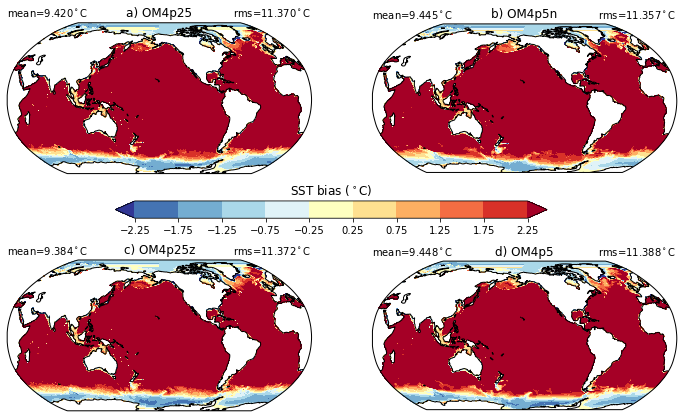

In [9]:
%%time
fig = plt.figure(figsize=(12, 8))
vmin,vmax,ci,cmap = -2.25,2.25,.5,plt.cm.RdYlBu_r
axes = []
cilev = numpy.arange(vmin-ci,vmax+ci*2,ci)
norm = matplotlib.colors.BoundaryNorm(boundaries=cilev, ncolors=cmap.N)

q = OM4p25_av - W25_av
ax = fig.add_subplot(2,2,1,projection=cartopy.crs.Robinson(central_longitude=-155))
im = ax.pcolormesh(xq25, yq25, q,
              transform=cartopy.crs.PlateCarree(), cmap=cmap, norm=norm, vmin=vmin, vmax=vmax)
stats(ax, a25, q, 'OMp25')
ax.coastlines()
axes.append(ax)
plt.title('a) OM4p25')

q = OM4p5nep_av - W5_av
ax = fig.add_subplot(2,2,2,projection=cartopy.crs.Robinson(central_longitude=-155))
im = ax.pcolormesh(xq5, yq5, q,
              transform=cartopy.crs.PlateCarree(), cmap=cmap, norm=norm)
stats(ax, a5, q, 'OMp5nep')
ax.coastlines()
axes.append(ax)
plt.title('b) OM4p5n')

q = OM4p25z_av - W25_av
ax = fig.add_subplot(2,2,3,projection=cartopy.crs.Robinson(central_longitude=-155))
im = ax.pcolormesh(xq25, yq25, q,
              transform=cartopy.crs.PlateCarree(), cmap=cmap, norm=norm)
stats(ax, a25, q, 'OMp25z')
ax.coastlines()
axes.append(ax)
plt.title('c) OM4p25z')

# q = OM4p5mle_av - W5_av
# ax = fig.add_subplot(2,2,3,projection=cartopy.crs.Robinson(central_longitude=-155))
# im = ax.pcolormesh(xq5, yq5, q,
#               transform=cartopy.crs.PlateCarree(), cmap=cmap, norm=norm)
# stats(ax, a5, q, 'OM4p5mle')
# ax.coastlines()
# axes.append(ax)
# plt.title('c) OM4p25e')

q = OM4p5_av - W5_av
ax = fig.add_subplot(2,2,4,projection=cartopy.crs.Robinson(central_longitude=-155))
im = ax.pcolormesh(xq5, yq5, q,
              transform=cartopy.crs.PlateCarree(), cmap=cmap, norm=norm, vmin=vmin, vmax=vmax)
stats(ax, a5, q, 'OMp5')
ax.coastlines()
axes.append(ax)
plt.title('d) OM4p5')

ax = plt.gcf().add_axes((.25,.5,.5,.03))
cb = matplotlib.colorbar.ColorbarBase(ax=ax, cmap=cmap, norm=norm, boundaries=cilev,
                                      orientation='horizontal', extend='both')
cb.ax.set_title('SST bias ($^\circ$C)')

plt.savefig('sst-bias.png')